# Informação

- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

# Carregar dados

In [3]:
student_mat = pd.read_csv("student-mat.csv", sep=';')
student_por = pd.read_csv("student-por.csv", sep=';')

print('estudantes de matemática:', len(student_mat))
print('estudantes de portugues:', len(student_por))
print('atributos:', student_mat.columns)

print(student_mat.values[0])


estudantes de matemática: 395
estudantes de portugues: 649
atributos: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
['GP' 'F' 18 'U' 'GT3' 'A' 4 4 'at_home' 'teacher' 'course' 'mother' 2 2 0
 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 4 3 4 1 1 3 6 5 6 6]


# Matriz de correlação

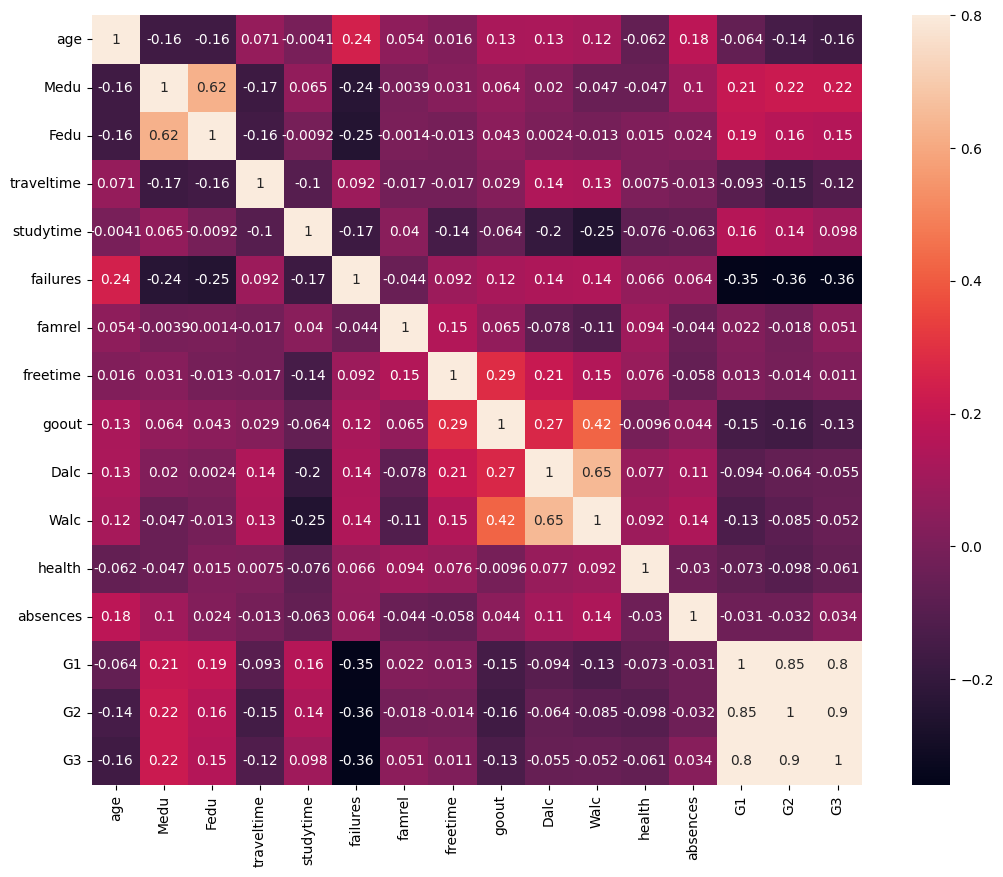

In [4]:
#correlation matrix
corrmat = student_mat.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);
plt.show()

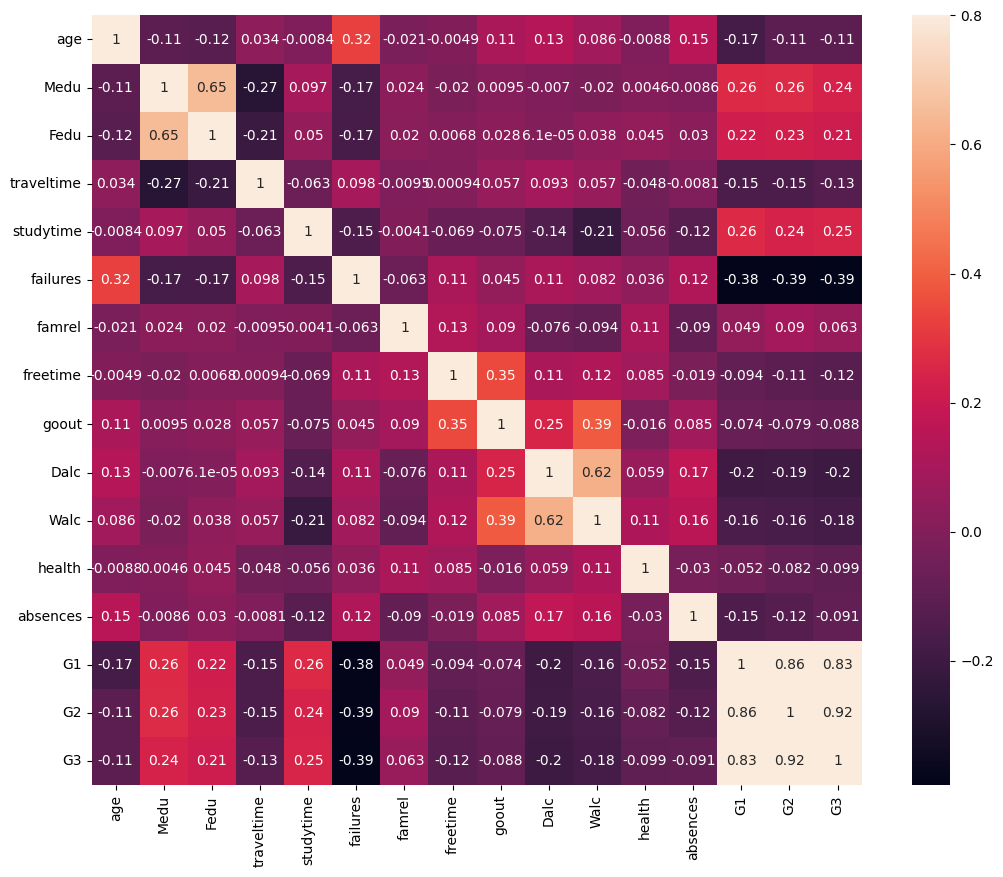

In [5]:
corrmat = student_por.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);
plt.show()

# Análise de correlação:
Ao analisar as duas tabelas de correção conseguimos perceber que, o que mais influencia positivamente as notas, são o tempo de estudo, nível de educação do pai e nivél de educação da mãe respetivamente. Na influência negativa das notas os fatores mais relevantes são os chumbos prévios, idade, consumo de alcool e tempo de viagem respetivamente.

# Análise de fatores não numéricos:

In [6]:
student_mat_non=student_mat
student_mat_non['school'], _ = pd.factorize(student_mat_non['school'])
student_mat_non['sex'], _ = pd.factorize(student_mat_non['sex'])
student_mat_non['address'], _ = pd.factorize(student_mat_non['address'])
student_mat_non['famsize'], _ = pd.factorize(student_mat_non['famsize'])
student_mat_non['Pstatus'], _ = pd.factorize(student_mat_non['Pstatus'])
student_mat_non['Mjob'], _ = pd.factorize(student_mat_non['Mjob'])
student_mat_non['Fjob'], _ = pd.factorize(student_mat_non['Fjob'])
student_mat_non['reason'], _ = pd.factorize(student_mat_non['reason'])
student_mat_non['guardian'], _ = pd.factorize(student_mat_non['guardian'])
student_mat_non['schoolsup'], _ = pd.factorize(student_mat_non['schoolsup'])
student_mat_non['famsup'], _ = pd.factorize(student_mat_non['famsup'])
student_mat_non['paid'], _ = pd.factorize(student_mat_non['paid'])
student_mat_non['activities'], _ = pd.factorize(student_mat_non['activities'])
student_mat_non['nursery'], _ = pd.factorize(student_mat_non['nursery'])
student_mat_non['higher'], _ = pd.factorize(student_mat_non['higher'])
student_mat_non['internet'], _ = pd.factorize(student_mat_non['internet'])
student_mat_non['romantic'], _ = pd.factorize(student_mat_non['romantic'])
student_mat_non = student_mat_non[["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","G1","G2","G3"]]

student_por_non=student_por
student_por_non['school'], _ = pd.factorize(student_por_non['school'])
student_por_non['sex'], _ = pd.factorize(student_por_non['sex'])
student_por_non['address'], _ = pd.factorize(student_por_non['address'])
student_por_non['famsize'], _ = pd.factorize(student_por_non['famsize'])
student_por_non['Pstatus'], _ = pd.factorize(student_por_non['Pstatus'])
student_por_non['Mjob'], _ = pd.factorize(student_por_non['Mjob'])
student_por_non['Fjob'], _ = pd.factorize(student_por_non['Fjob'])
student_por_non['reason'], _ = pd.factorize(student_por_non['reason'])
student_por_non['guardian'], _ = pd.factorize(student_por_non['guardian'])
student_por_non['schoolsup'], _ = pd.factorize(student_por_non['schoolsup'])
student_por_non['famsup'], _ = pd.factorize(student_por_non['famsup'])
student_por_non['paid'], _ = pd.factorize(student_por_non['paid'])
student_por_non['activities'], _ = pd.factorize(student_por_non['activities'])
student_por_non['nursery'], _ = pd.factorize(student_por_non['nursery'])
student_por_non['higher'], _ = pd.factorize(student_por_non['higher'])
student_por_non['internet'], _ = pd.factorize(student_por_non['internet'])
student_por_non['romantic'], _ = pd.factorize(student_por_non['romantic'])
student_por_non = student_por_non[["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","G1","G2","G3"]]

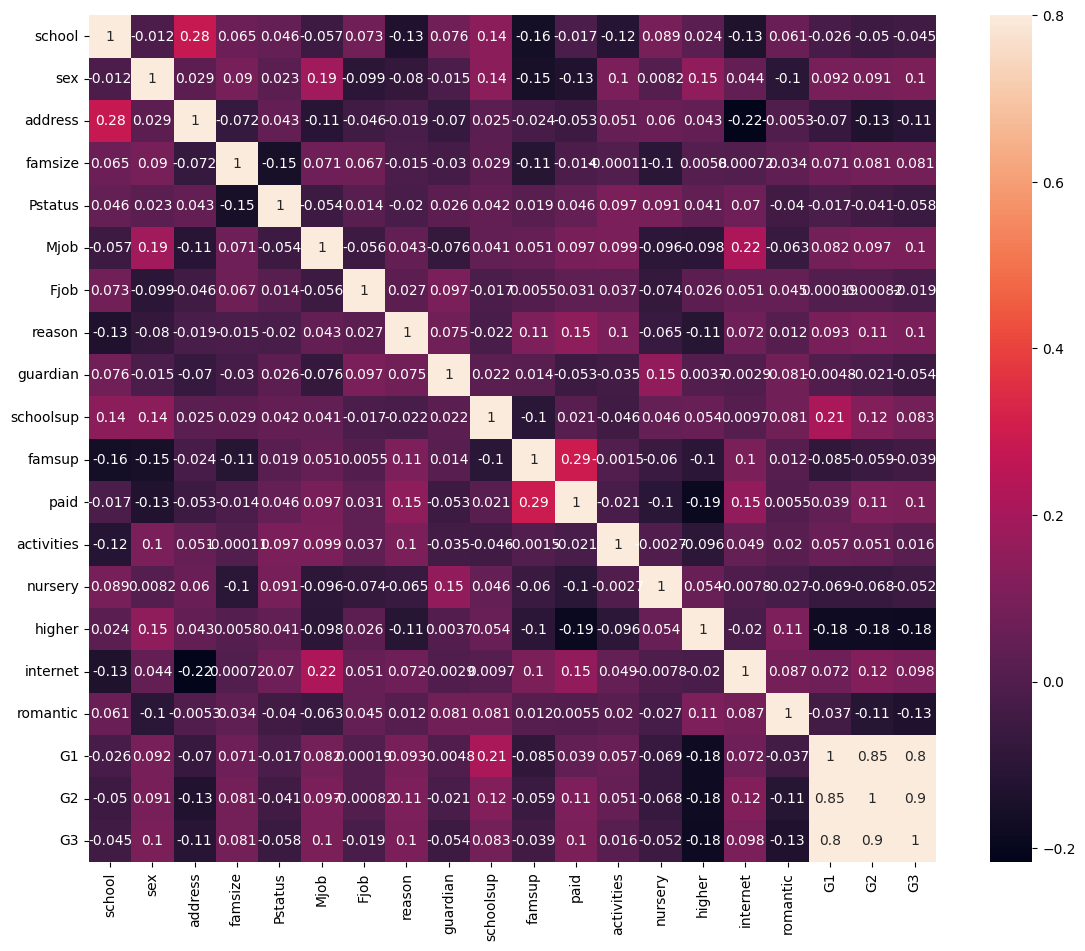

In [7]:
corrmat = student_mat_non.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);
plt.show()

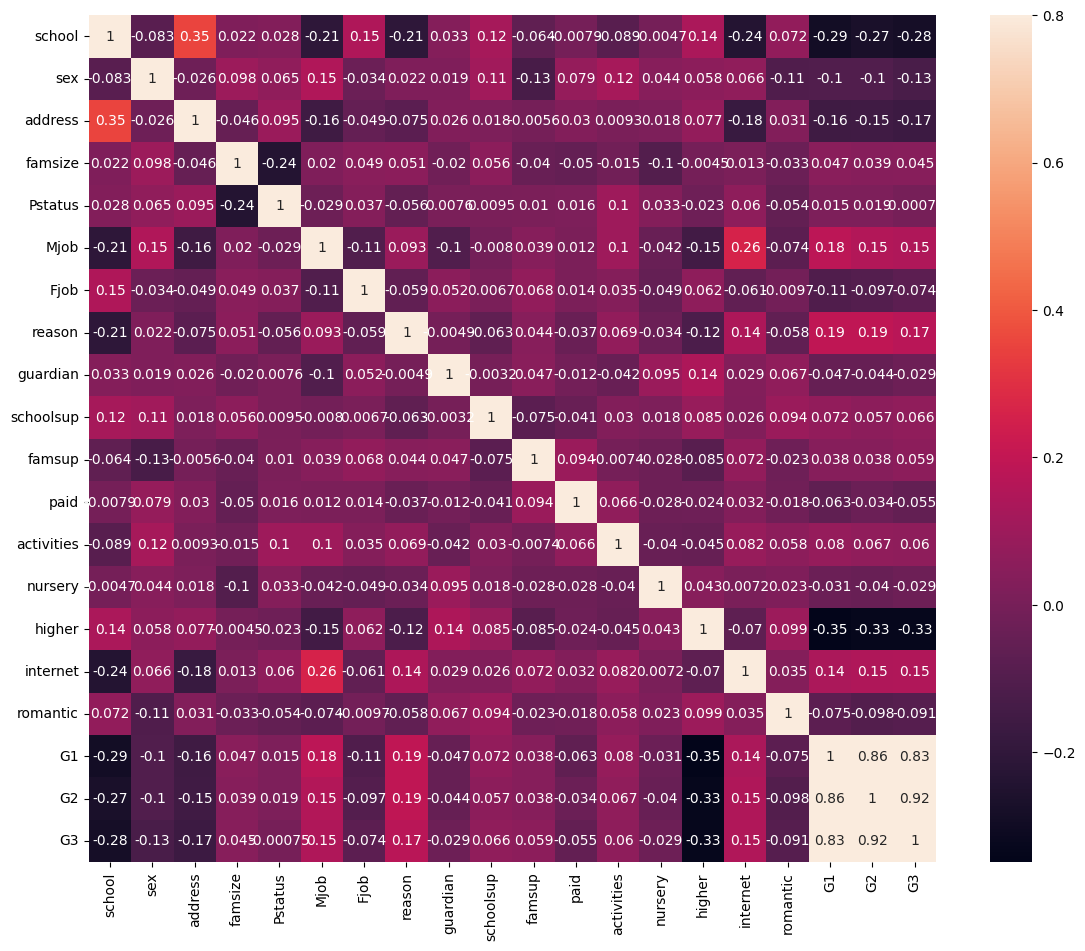

In [8]:
corrmat = student_por_non.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);
plt.show()

# Análise de correlação (fatores categóricos):
Esta tabela terá de ter uma análise diferente da acima pela razão de, sendo atributos categóricos, o valor númerico atribuido representar uma situação e não um valor em concreto. Posto isto iremos considerar apenas o valor, sem considerar se é positivo ou negativo. As maiores corelações com notas, para a disciplina de matemática são os atributos de ter um suporte educacional fora de escola, a pretenção de seguir para o superior e ainda o lugar da sua habitação.
Para a disciplina de português vemos um panorama muito diferente sendo que além das influencias dos fatores anterioremente mencionados existe uma grande relação com a escola do aluno, trabalho da mãe, escolha da escola em questão e ainda possuir internet em casa. Em português o fator de suporte educacional fora de escola tem uma influência mais reduzida nas notas quando comparado com matemática.

# Como a escola em questão influência as notas

In [9]:
# notas gerais
student_grades = pd.concat([student_mat, student_por], ignore_index=True)

student_grades.loc[student_grades['G3'] < 5, 'Grades'] = '<5'
student_grades.loc[(student_grades['G3'] >= 5) & (student_grades['G3'] <= 7), 'Grades'] = '5-7'
student_grades.loc[(student_grades['G3'] >= 8)& (student_grades['G3'] <= 9), 'Grades'] = '8-9'
student_grades.loc[(student_grades['G3'] >= 10) &(student_grades['G3'] <= 12), 'Grades'] = '10-12'
student_grades.loc[(student_grades['G3'] >= 13) &(student_grades['G3'] <= 15), 'Grades'] = '13-15'
student_grades.loc[(student_grades['G3'] >= 16) &(student_grades['G3'] <= 17), 'Grades'] = '16-17'
student_grades.loc[(student_grades['G3'] >= 18) &(student_grades['G3'] <= 20), 'Grades'] = '18-20'


# GP
student_mat_grades_GP = student_grades[(student_grades.school == 0)]
# MS
student_mat_grades_MS = student_grades[(student_grades.school == 1)]

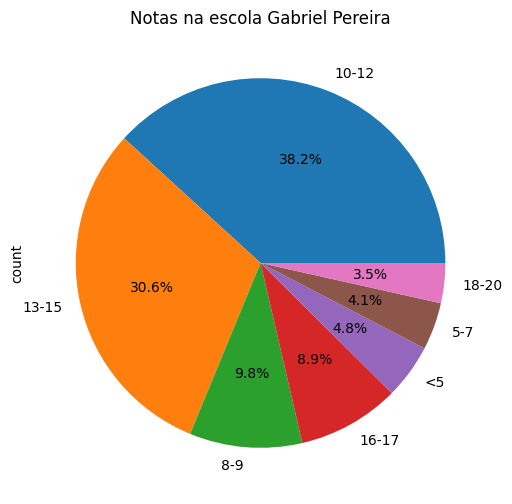

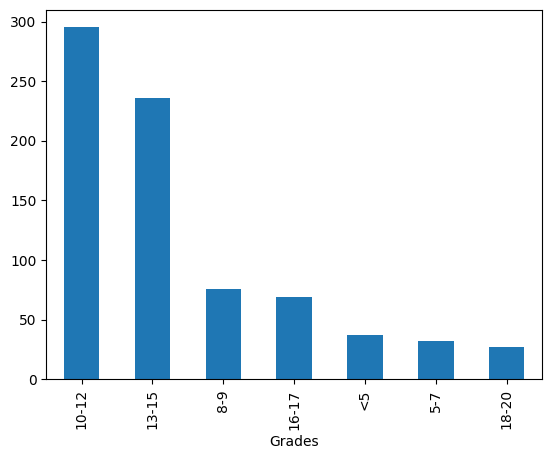

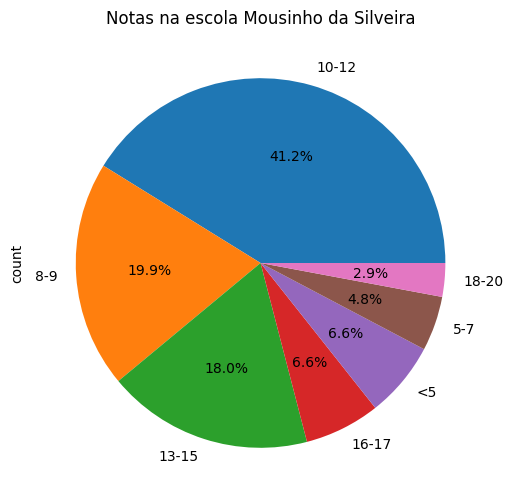

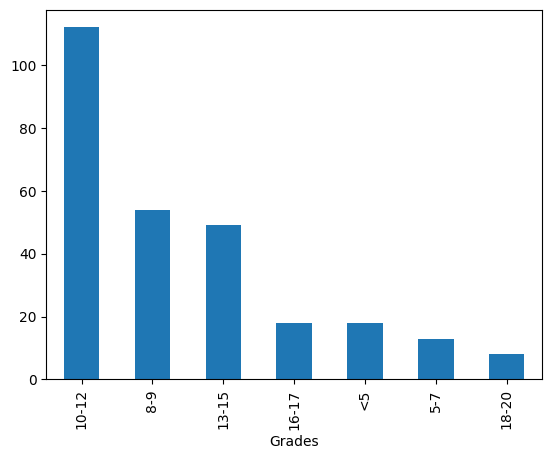

Média das notas da escola Gabriel Pereira: nan
Média das notas da escola Gabriel Pereira: nan


In [10]:
f, ax = plt.subplots(figsize=(10, 6))
student_mat_grades_GP['Grades'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax)
ax.set_title('Notas na escola Gabriel Pereira')
# 67.6% positivas
plt.show()

student_mat_grades_GP['Grades'].value_counts().plot(kind="bar")
plt.show()


f, ax = plt.subplots(figsize=(10, 6))
student_mat_grades_MS['Grades'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax)
ax.set_title('Notas na escola Mousinho da Silveira')
# 63.1% positivas
plt.show()

student_mat_grades_MS['Grades'].value_counts().plot(kind="bar")
plt.show()


print("Média das notas da escola Gabriel Pereira:", student_grades[(student_grades.school == 'GP')]['G3'].mean() )
print("Média das notas da escola Gabriel Pereira:", student_grades[(student_grades.school == 'MS')]['G3'].mean() )



# Análise de escolas:
Ao comparar os gráficos das notas de ambas as escolas obtém-se que a escola tem, no geral, melhores notas do que a Mousinho Silva.
...

In [11]:
# notas gerais
student_grades_fragment = pd.concat([student_mat, student_por], ignore_index=True)

student_grades_fragment.loc[student_grades_fragment['G3'] <= 5, 'Grades'] = '0-5'
student_grades_fragment.loc[(student_grades_fragment['G3'] >= 6) & (student_grades_fragment['G3'] <= 9), 'Grades'] = '6-9'
student_grades_fragment.loc[(student_grades_fragment['G3'] >= 10) & (student_grades_fragment['G3'] <= 14), 'Grades'] = '10-14'
student_grades_fragment.loc[(student_grades_fragment['G3'] >= 15) & (student_grades_fragment['G3'] <= 20), 'Grades'] = '15-20'


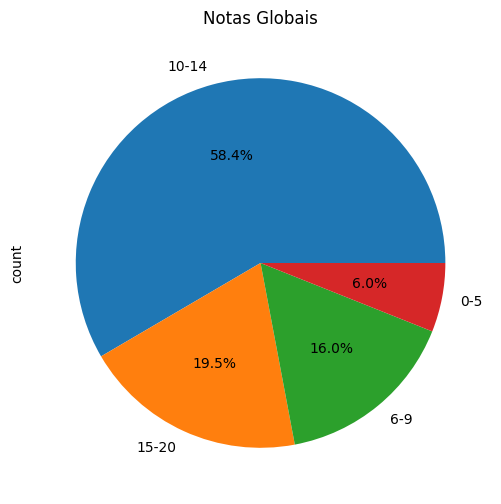

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
student_grades_fragment['Grades'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax)
ax.set_title('Notas Globais')
plt.show()


# Diferenças entre alunos com notas altas (15-20) e alunos com piores notas (0-5)

Tentar perceber quais são as pessoas que estão entre o 0-5 e 15-20, tendo atenção em:

- o tempo de estudo 
- nível de educação do pai 
- nivel de educação da mãe  
- chumbos prévios 
- idade 
- consumo de alcool 
- tempo de viagem respetivamente.
---
- atributos de ter um suporte educacional fora de escola
- a pretenção de seguir para o superior  
- o lugar da sua habitação.

Tempo de estudo semanal: 1 : <2 horas, 2 : 2 to 5 horas, 3 : 5 to 10 horas, or 4 : >10 horas
Alunos entre 15 e 20
De 204 : 19.61%  - 48.04%  - 24.02%  -  8.33%


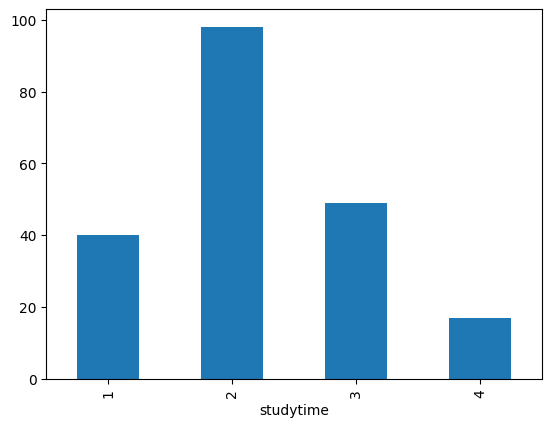

Alunos entre 0 e 5
De 63 : 41.27%  - 44.44%  -  9.52%  -  4.76%


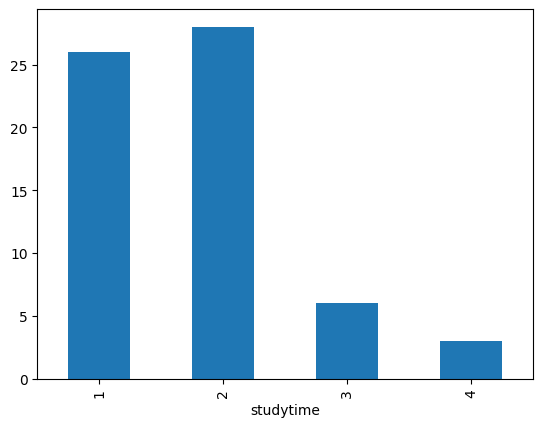

In [13]:
students_0_5 = student_grades_fragment.loc[student_grades_fragment['Grades'] == '0-5']
students_15_20 = student_grades_fragment.loc[student_grades_fragment['Grades'] == '15-20']

nr_0_5 = len(students_0_5)
nr_15_20 = len(students_15_20)

# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
students_15_20_study_1 = students_15_20.loc[students_15_20['studytime'] == 1]
students_15_20_study_2 = students_15_20.loc[students_15_20['studytime'] == 2]
students_15_20_study_3 = students_15_20.loc[students_15_20['studytime'] == 3]
students_15_20_study_4 = students_15_20.loc[students_15_20['studytime'] == 4]
print("Tempo de estudo semanal: 1 : <2 horas, 2 : 2 to 5 horas, 3 : 5 to 10 horas, or 4 : >10 horas")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_study_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_study_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_study_3)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_study_4)/nr_15_20*100))

students_15_20['studytime'].value_counts().sort_index().plot(kind="bar")
plt.show()

students_0_5_study_1 = students_0_5.loc[students_0_5['studytime'] == 1]
students_0_5_study_2 = students_0_5.loc[students_0_5['studytime'] == 2]
students_0_5_study_3 = students_0_5.loc[students_0_5['studytime'] == 3]
students_0_5_study_4 = students_0_5.loc[students_0_5['studytime'] == 4]
label_order = ['1', '2', '3', '4']



print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_study_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_study_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_study_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_study_4)/nr_0_5*100))
students_0_5['studytime'].value_counts().sort_index().plot(kind="bar")
plt.show()



Educação do pai: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education
Alunos entre 15 e 20
De 204 : 15.20%  - 30.88%  - 22.06%  - 30.88%


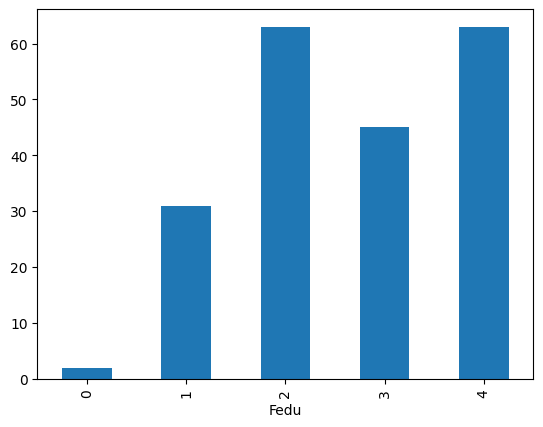

Alunos entre 0 e 5
De 63 : 31.75%  - 36.51%  - 14.29%  - 14.29%


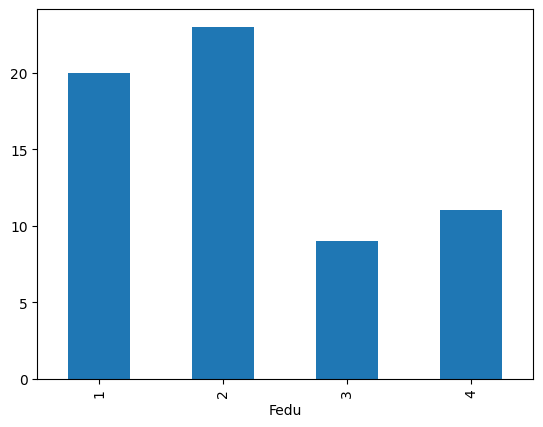

In [14]:
# Educação do pai
# -------------------------------------------------------------------------------
# Fedu father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

students_15_20_fedu_1 = students_15_20.loc[students_15_20['Fedu'] == 1]
students_15_20_fedu_2 = students_15_20.loc[students_15_20['Fedu'] == 2]
students_15_20_fedu_3 = students_15_20.loc[students_15_20['Fedu'] == 3]
students_15_20_fedu_4 = students_15_20.loc[students_15_20['Fedu'] == 4]
print("\nEducação do pai: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_fedu_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fedu_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fedu_3)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fedu_4)/nr_15_20*100))

students_15_20['Fedu'].value_counts().sort_index().plot(kind="bar")
plt.show()

students_0_5_fedu_1 = students_0_5.loc[students_0_5['Fedu'] == 1]
students_0_5_fedu_2 = students_0_5.loc[students_0_5['Fedu'] == 2]
students_0_5_fedu_3 = students_0_5.loc[students_0_5['Fedu'] == 3]
students_0_5_fedu_4 = students_0_5.loc[students_0_5['Fedu'] == 3]
print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_fedu_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fedu_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fedu_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fedu_4)/nr_0_5*100))

students_0_5['Fedu'].value_counts().sort_index().plot(kind="bar")
plt.show()


Educação da mãe: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education
Alunos entre 15 e 20
De 204 :  7.84%  - 19.61%  - 24.51%  - 46.57%


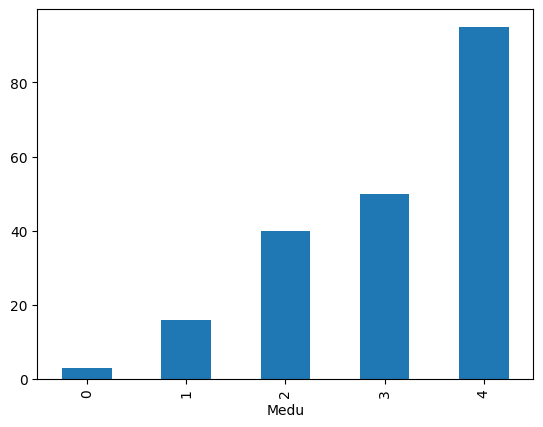

Alunos entre 0 e 5
De 63 : 25.40%  - 30.16%  - 23.81%  - 23.81%


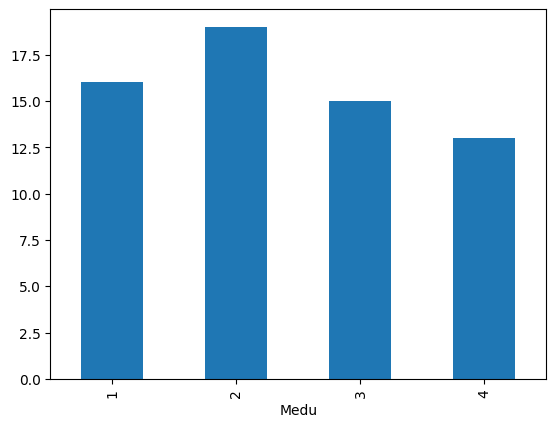

In [15]:
# -------------------------------------------------------------------------------
# Medu mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

students_15_20_medu_1 = students_15_20.loc[students_15_20['Medu'] == 1]
students_15_20_medu_2 = students_15_20.loc[students_15_20['Medu'] == 2]
students_15_20_medu_3 = students_15_20.loc[students_15_20['Medu'] == 3]
students_15_20_medu_4 = students_15_20.loc[students_15_20['Medu'] == 4]
print("\nEducação da mãe: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_medu_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_medu_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_medu_3)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_medu_4)/nr_15_20*100))

students_15_20['Medu'].value_counts().sort_index().plot(kind="bar")
plt.show()


students_0_5_medu_1 = students_0_5.loc[students_0_5['Medu'] == 1]
students_0_5_medu_2 = students_0_5.loc[students_0_5['Medu'] == 2]
students_0_5_medu_3 = students_0_5.loc[students_0_5['Medu'] == 3]
students_0_5_medu_4 = students_0_5.loc[students_0_5['Medu'] == 3]
print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_medu_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_medu_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_medu_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_medu_4)/nr_0_5*100))

students_0_5['Medu'].value_counts().sort_index().plot(kind="bar")
plt.show()



 Número de chumbos of past class failures (numeric: n if 1<=n<3, else 4)
Alunos entre 15 e 20
De 204 : 98.04%  -  0.98%  -  0.98%  -  0.00%


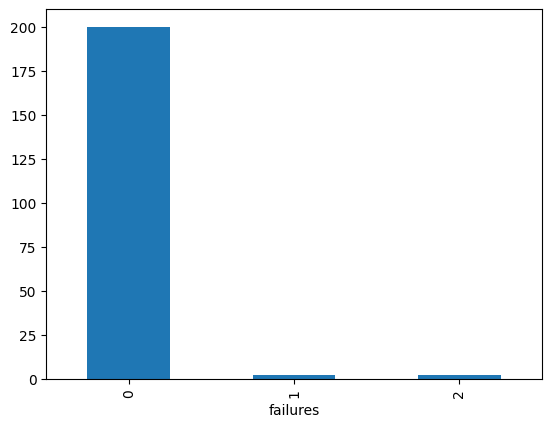

Alunos entre 0 e 5
De 63 : 42.86%  - 31.75%  - 12.70%  - 12.70%  -  0.00%


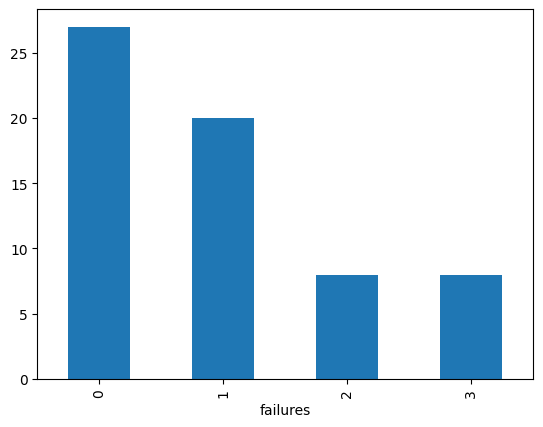

In [16]:
# -------------------------------------------------------------------------------
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)

students_15_20_fail_0 = students_15_20.loc[students_15_20['failures'] == 0]
students_15_20_fail_1 = students_15_20.loc[students_15_20['failures'] == 1]
students_15_20_fail_2 = students_15_20.loc[students_15_20['failures'] == 2]
students_15_20_fail_3 = students_15_20.loc[students_15_20['failures'] == 3]
students_15_20_fail_4 = students_15_20.loc[students_15_20['failures'] == 4]
print("\n Número de chumbos of past class failures (numeric: n if 1<=n<3, else 4)")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_fail_0)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fail_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fail_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_fail_3)/nr_15_20*100)), " -","{:5.2f}%".format(len(students_15_20_fail_4)/nr_15_20*100)

students_15_20['failures'].value_counts().sort_index().plot(kind="bar")
plt.show()


students_0_5_fail_0 = students_0_5.loc[students_0_5['failures'] == 0]
students_0_5_fail_1 = students_0_5.loc[students_0_5['failures'] == 1]
students_0_5_fail_2 = students_0_5.loc[students_0_5['failures'] == 2]
students_0_5_fail_3 = students_0_5.loc[students_0_5['failures'] == 3]
students_0_5_fail_4 = students_0_5.loc[students_0_5['failures'] == 4]
print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_fail_0)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fail_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fail_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fail_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_fail_4)/nr_0_5*100))

students_0_5['failures'].value_counts().sort_index().plot(kind="bar")
plt.show()



 Consumo de alcool durante semana (numeric: from 1 - very low to 5 - very high)
Alunos entre 15 e 20
De 204 : 82.35%  - 13.73%  -  2.94%  -  0.00%


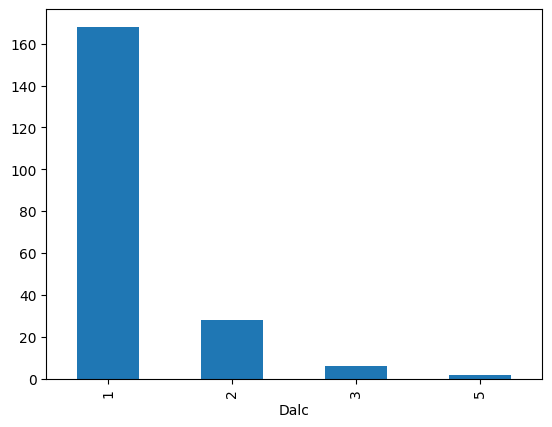

Alunos entre 0 e 5
De 63 : 58.73%  - 28.57%  -  1.59%  -  7.94%  -  3.17%


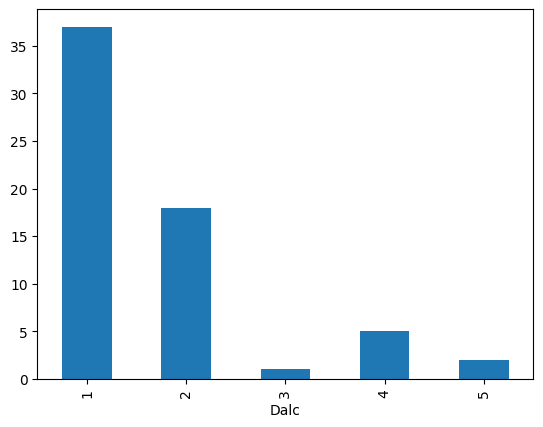

In [17]:
# -------------------------------------------------------------------------------
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

students_15_20_dalc_1 = students_15_20.loc[students_15_20['Dalc'] == 1]
students_15_20_dalc_2 = students_15_20.loc[students_15_20['Dalc'] == 2]
students_15_20_dalc_3 = students_15_20.loc[students_15_20['Dalc'] == 3]
students_15_20_dalc_4 = students_15_20.loc[students_15_20['Dalc'] == 4]
students_15_20_dalc_5 = students_15_20.loc[students_15_20['Dalc'] == 5]
print("\n Consumo de alcool durante semana (numeric: from 1 - very low to 5 - very high)")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_dalc_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_dalc_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_dalc_3)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_dalc_4)/nr_15_20*100)), " -","{:5.2f}%".format(len(students_15_20_dalc_5)/nr_15_20*100)

students_15_20['Dalc'].value_counts().sort_index().plot(kind="bar")
plt.show()


students_0_5_dalc_1 = students_0_5.loc[students_0_5['Dalc'] == 1]
students_0_5_dalc_2 = students_0_5.loc[students_0_5['Dalc'] == 2]
students_0_5_dalc_3 = students_0_5.loc[students_0_5['Dalc'] == 3]
students_0_5_dalc_4 = students_0_5.loc[students_0_5['Dalc'] == 4]
students_0_5_dalc_5 = students_0_5.loc[students_0_5['Dalc'] == 5]
print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_dalc_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_dalc_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_dalc_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_dalc_4)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_dalc_5)/nr_0_5*100))

students_0_5['Dalc'].value_counts().sort_index().plot(kind="bar")
plt.show()




 tempo de deslocacao - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
Alunos entre 15 e 20
De 204 : 66.18%  - 28.43%  -  4.90%  -  0.49%


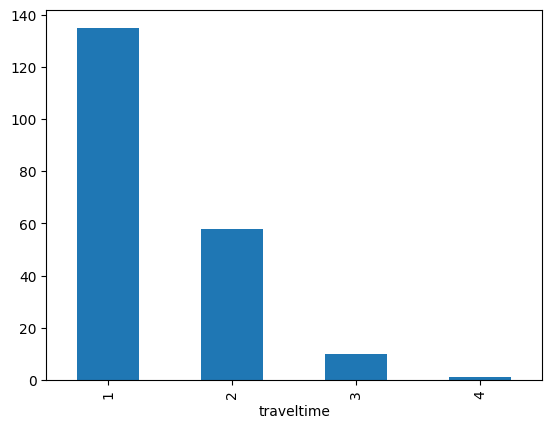

Alunos entre 0 e 5
De 63 : 55.56%  - 33.33%  -  9.52%  -  1.59%


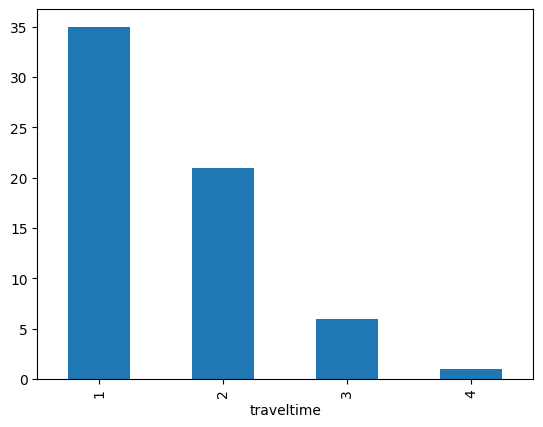

In [18]:
# -------------------------------------------------------------------------------
# traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

students_15_20_travel_1 = students_15_20.loc[students_15_20['traveltime'] == 1]
students_15_20_travel_2 = students_15_20.loc[students_15_20['traveltime'] == 2]
students_15_20_travel_3 = students_15_20.loc[students_15_20['traveltime'] == 3]
students_15_20_travel_4 = students_15_20.loc[students_15_20['traveltime'] == 4]
print("\n tempo de deslocacao - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)")
print("Alunos entre 15 e 20")
print("De",nr_15_20, ":","{:5.2f}%".format(len(students_15_20_travel_1)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_travel_2)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_travel_3)/nr_15_20*100), " -","{:5.2f}%".format(len(students_15_20_travel_4)/nr_15_20*100))

students_15_20['traveltime'].value_counts().sort_index().plot(kind="bar")
plt.show()


students_0_5_travel_1 = students_0_5.loc[students_0_5['traveltime'] == 1]
students_0_5_travel_2 = students_0_5.loc[students_0_5['traveltime'] == 2]
students_0_5_travel_3 = students_0_5.loc[students_0_5['traveltime'] == 3]
students_0_5_travel_4 = students_0_5.loc[students_0_5['traveltime'] == 4]
print("Alunos entre 0 e 5")
print("De",nr_0_5, ":","{:5.2f}%".format(len(students_0_5_travel_1)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_travel_2)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_travel_3)/nr_0_5*100), " -","{:5.2f}%".format(len(students_0_5_travel_4)/nr_0_5*100))

students_0_5['traveltime'].value_counts().sort_index().plot(kind="bar")
plt.show()



Boxplots: Examinar a relação entre o tempo de estudo (tempoestudo) e as notas finais (G3).

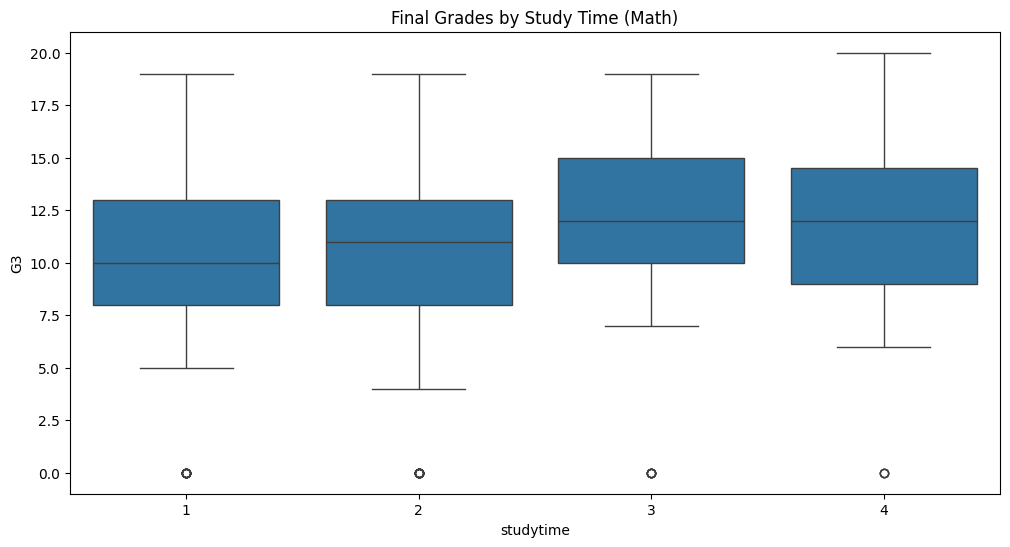

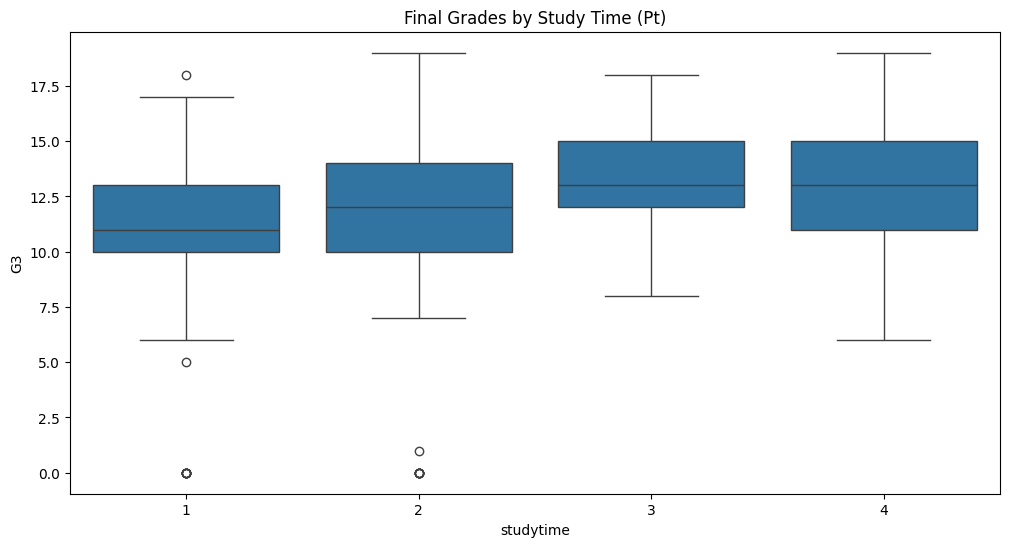

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat)
plt.title('Final Grades by Study Time (Math)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='studytime', y='G3', data=student_por)
plt.title('Final Grades by Study Time (Pt)')
plt.show()


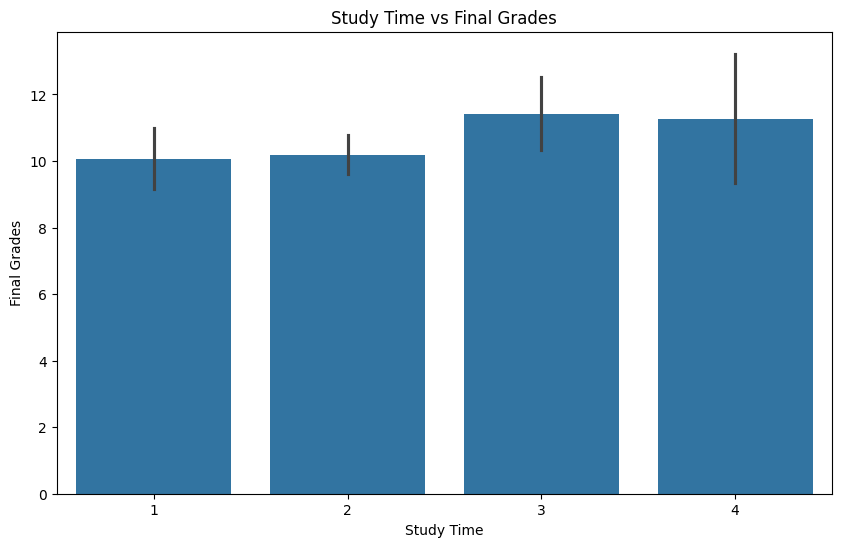

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='studytime', y='G3', data=student_mat)
plt.title('Study Time vs Final Grades')
plt.xlabel('Study Time')
plt.ylabel('Final Grades')
plt.show()


Verificar qual o efeito do nível de escolaridade dos pais (Medu, Fedu) nas notas finais dos alunos

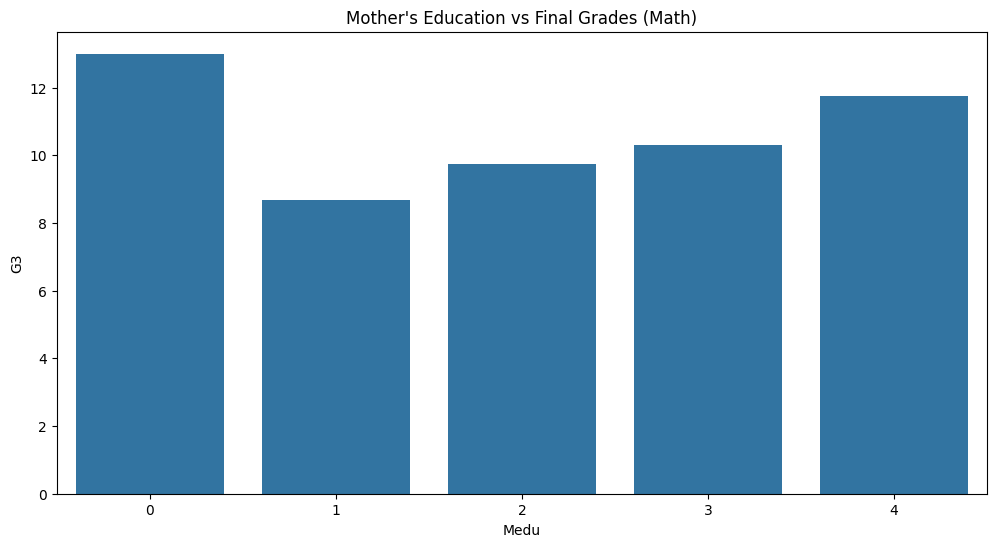

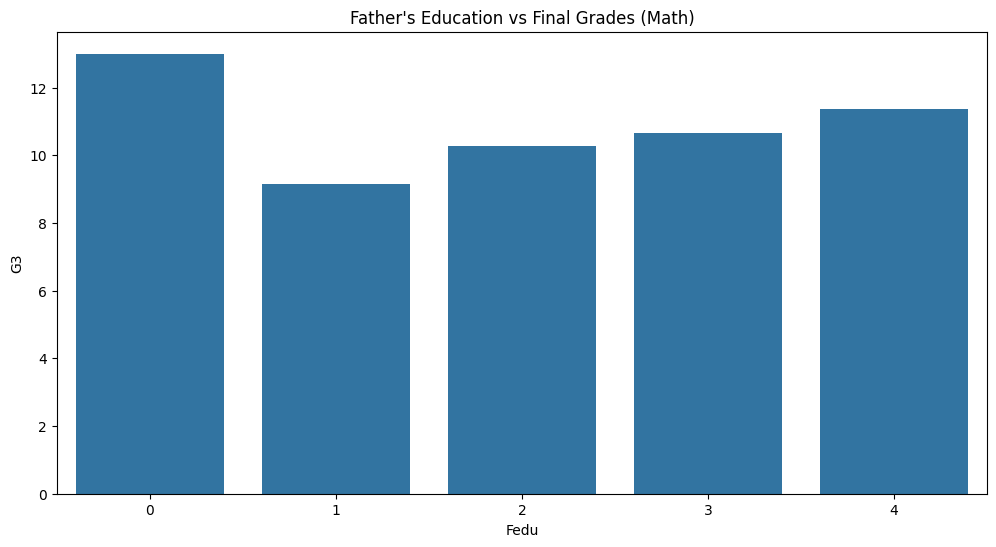

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Medu', y='G3', data=student_mat, errorbar=None)
plt.title('Mother\'s Education vs Final Grades (Math)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Fedu', y='G3', data=student_mat, errorbar=None)
plt.title('Father\'s Education vs Final Grades (Math)')
plt.show()


## Romantic Relationships vs. Final Grades:

analisar se os alunos que estão em relacionamentos amorosos têm notas finais diferentes daqueles que não estão em relacionamentos.

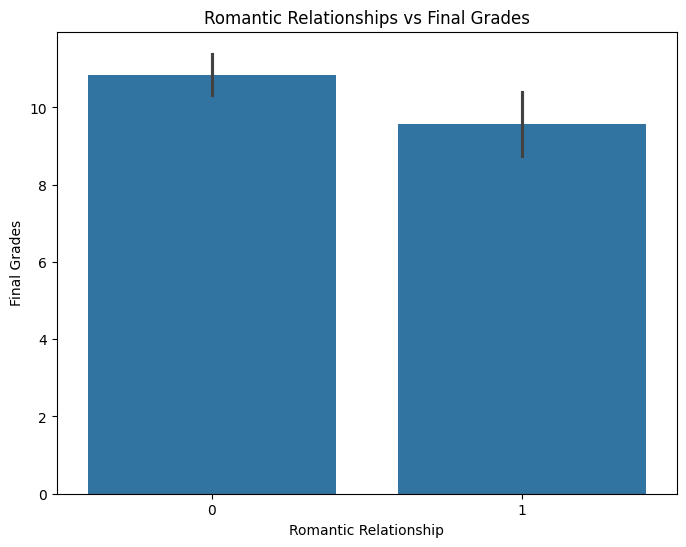

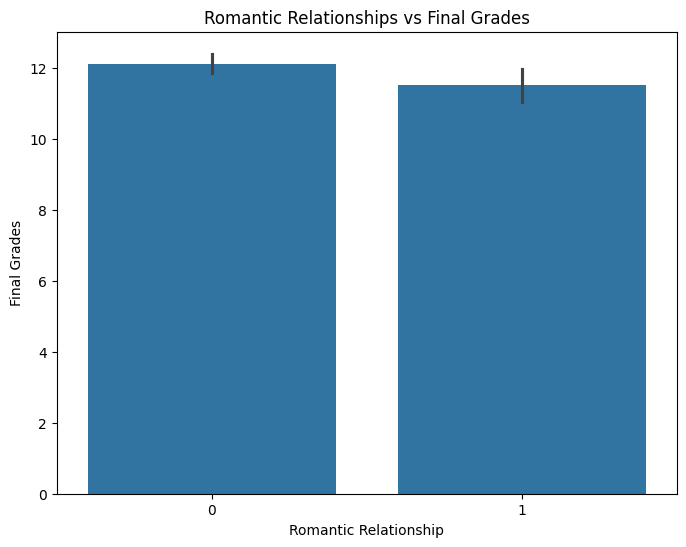

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='romantic', y='G3', data=student_mat)
plt.title('Romantic Relationships vs Final Grades')
plt.xlabel('Romantic Relationship')
plt.ylabel('Final Grades')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='romantic', y='G3', data=student_por)
plt.title('Romantic Relationships vs Final Grades')
plt.xlabel('Romantic Relationship')
plt.ylabel('Final Grades')
plt.show()
